# Day 5

In [1]:
from scipy import stats
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Compute mean w/o Pandas or Numpy

In [2]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# TODO: Complete this function by having the function return the average value of our dataset.
def compute_mean(dataset):
    """ Main function that calculates the average value across our data. """
    return sum(data) / len(data)

compute_mean(data)

4.391304347826087

In [3]:
data.mean()

4.391304347826087

## Compute median

In [4]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# HINT: Consider using DataFrame slicing to help with identifying the correct median value(s).
def compute_median(dataset):
    """ Main function that determines the median value across our data. """
    count = len(dataset)
    sorted_dataset = sorted(dataset)
    
    if count < 1:
        return
    if count % 2 == 1:
        return sorted_dataset[count // 2]
    else:
        first = count // 2 - 1
        return sum(sorted_dataset[first:first+1]) / 2
    
compute_median(data)

4

In [5]:
np.median(data)

4.0

# Find Mode

In [6]:
# NOTE: Tricker than it looks!
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# TODO: Complete this function by having the function return the relative mode across our dataset.
# HINT: Remember histograms and tokenization from CS 1.2? How many they help you here? 
def compute_mode(dataset):
    """ Main function that determines the mode value across our data. """
    hist = {}
    
    for num in dataset:
        if num in hist:
            hist[num] += 1
        else:
            hist[num] = 1
    
    return max(hist, key=hist.get)

compute_mode(data)

3

In [7]:
stats.mode(data)

ModeResult(mode=array([3]), count=array([5]))

# Mean and Median of Titanic Fares

In [8]:
df = pd.read_csv('../Notebooks/Datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
ls_fare = df['Fare'].dropna().values
print(ls_fare[:10])

[ 7.25   71.2833  7.925  53.1     8.05    8.4583 51.8625 21.075  11.1333
 30.0708]


In [10]:
fare_mean = np.mean(ls_fare)
fare_mode = stats.mode(ls_fare)
fare_median = np.median(ls_fare)

### Less than mean

In [11]:
(ls_fare < fare_mean).mean()

0.7631874298540965

### Less than median

In [12]:
(ls_fare < fare_median).mean()

0.49382716049382713

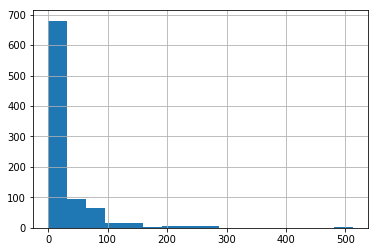

In [13]:
df['Fare'].hist(bins=16)
plt.show()

## Range of Dataset

In [14]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

def compute_range(dataset):
    """ Main function that determines the range of values across our data. """
    return (min(data), max(data))

compute_range(data)

(0, 10)

## Calculate STD Deviation

In [26]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# NOTE: Since we need the true mean across our data, let's use our previously written function!
def compute_standard_deviation(dataset):
    """ Main function that approximates the standard deviation of our data. """
    true_mean = compute_mean(dataset)
    
    sum_diffs_squared = sum((num - true_mean) ** 2 for num in dataset)
    variance = sum_diffs_squared / len(dataset)
#     variance = compute_mean((num - true_mean) ** 2 for num in dataset) # Doesn't 
#     variance = np.array([(num - true_mean) ** 2 for num in dataset]).mean()
    
    return math.sqrt(variance)

compute_standard_deviation(data)

3.074992123493378

In [16]:
np.std(data)

3.074992123493378

## Compute Percentile w/ Numpy

In [17]:
np.percentile(ls_fare, 75)

31.0

In [21]:
(ls_fare <= 31).mean()

0.7508417508417509